# 12주차 과제_60180874 김하경
임의의 텍스트 데이터(영화 리뷰는 제외)를 선정하여 토픽모델링을 해보시오.
## # 에타(8~10월 '코로나' 검색자료)

In [1]:
import pandas as pd
from konlpy.tag import Okt

df = pd.read_excel('search.xlsx')

In [2]:
df['year'] = df['날짜'].dt.strftime('%Y-%m')
df = df[df['year'].str.contains('2020-08|2020-09|2020-10')]
df

,날짜,제목,본문,작성연도,year
11,2020-10-29 11:49:00,제 15회 명지대학교 영상제 MUFF 이벤트!,제15회 명지대학교 영상제 MUFF에서 상영될 작품의 감독님께 질문하고 외식상품권 ...,2020,2020-10
12,2020-10-28 17:42:00,성적증명서,장학금 신청하려고 성적증명서가 필요하대서\n이번주중에 학교 다녀오려는데\n\n코로나...,2020,2020-10
13,2020-10-28 01:45:00,20학번 휴학의 불행,새내기 = 싸강으로 학교 모름\n21년 = 코로나로 또 싸강이면 휴학으로 심신 안정...,2020,2020-10
14,2020-10-28 00:44:00,겨울에,코로나 대유행 다시올까..?\n지긋지긋해\n언제쯤 맘편히 해외갈 수 있을까,2020,2020-10
15,2020-10-28 00:22:00,일반 현역병 vs 우체국공익,일반 현역병\n운전병 행정병 이딴거 없음\n최전방 근무\n작업 훈련 열외 일체 없음...,2020,2020-10
16,2020-10-27 08:36:00,올해 주식으로 돈못먹을수가있나,코로나로 떡락하고 3월부터 지금까지 모든장이 다 떡상인데 주식 잘한다고 남들 다 하...,2020,2020-10
17,2020-10-25 16:57:00,애더라 학교 주변 코노 안전하냐,나 원래 학교 공강때마다 코노가는 코노 죽순이었는데 코로나 터지고 한번도 못갔어 진...,2020,2020-10
18,2020-10-25 01:14:00,얘드라 지금 학교 건물들 출입,그 마이아이웹으로 하는 코로나 검사 때문에 우리 학교 학생들만 들어갈 수 있음??,2020,2020-10
19,2020-10-24 16:56:00,근데 총학투표는 어케함?,코로나라서 학교 오라곤 안할거아냐,2020,2020-10
31,2020-10-29 11:49:00,제 15회 명지대학교 영상제 MUFF 이벤트!,제15회 명지대학교 영상제 MUFF에서 상영될 작품의 감독님께 질문하고 외식상품권 ...,2020,2020-10


In [3]:
print(df.shape)

(338, 5)


## 데이터 전처리

In [4]:
df = df.dropna(how='any')  # 데이터가 한개라도 없으면 drop 해라
df['본문'] = df['본문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

okt = Okt()
tokenized_data = []
stop_words =['코로나']

for sentence in df['본문']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    temp_X = [word for word in temp_X if word not in stop_words] # 불용어 처리
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('corona_tokenized.csv')

## 토픽 개수별 응집도 구하기

100%|█████████████████████████████████████████████████████████████████████████████| 339/339 [00:00<00:00, 48554.47it/s]
2020-11-27 17:00:37,798 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-27 17:00:37,913 : INFO : built Dictionary(3037 unique tokens: ['', '0', '1', '10', '100']...) from 339 documents (total 195603 corpus positions)
2020-11-27 17:00:37,920 : INFO : discarding 2967 tokens: [('', 338), ('0', 2), ('1', 2), ('10', 2), ('100', 2), ('101', 2), ('102', 2), ('103', 2), ('104', 2), ('105', 2)]...
2020-11-27 17:00:37,921 : INFO : keeping 70 tokens which were in no less than 10 and no more than 16 (=5.0%) documents
2020-11-27 17:00:37,924 : INFO : resulting dictionary: Dictionary(70 unique tokens: ['기간', '대한', '온라인', '이후', '작성']...)
2020-11-27 17:00:38,036 : INFO : using symmetric alpha at 0.5
2020-11-27 17:00:38,037 : INFO : using symmetric eta at 0.5
2020-11-27 17:00:38,038 : INFO : using serial LDA version on this node
2020-11-27 17:00:38,043 : INFO : 

Number of unique tokens: 70
Number of documents: 339


2020-11-27 17:00:38,386 : INFO : -4.776 per-word bound, 27.4 perplexity estimate based on a held-out corpus of 339 documents with 1377 words
2020-11-27 17:00:38,387 : INFO : PROGRESS: pass 0, at document #339/339
2020-11-27 17:00:38,587 : INFO : topic #0 (0.500): 0.038*"졸업" + 0.036*"봉사" + 0.029*"수업" + 0.028*"신청" + 0.028*"사진" + 0.027*"등록금" + 0.026*"사태" + 0.025*"사항" + 0.024*"의견" + 0.024*"준비"
2020-11-27 17:00:38,588 : INFO : topic #1 (0.500): 0.081*"봉사" + 0.046*"신청" + 0.026*"감염" + 0.025*"대한" + 0.025*"문제" + 0.025*"경우" + 0.024*"알바" + 0.020*"학점" + 0.020*"계속" + 0.019*"동안"
2020-11-27 17:00:38,589 : INFO : topic diff=0.437964, rho=1.000000
2020-11-27 17:00:38,592 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2020-11-27 17:00:39,480 : INFO : 1 batches submitted to accumulate stats from 64 documents (29952 virtual)
2020-11-27 17:00:39,510 : INFO : 2 batches submitted to accumulate stats from 128 documents (59904 virtual

2020-11-27 17:00:52,767 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2020-11-27 17:00:53,517 : INFO : 1 batches submitted to accumulate stats from 64 documents (29952 virtual)
2020-11-27 17:00:53,536 : INFO : 2 batches submitted to accumulate stats from 128 documents (59904 virtual)
2020-11-27 17:00:53,558 : INFO : 3 batches submitted to accumulate stats from 192 documents (89856 virtual)
2020-11-27 17:00:55,767 : INFO : 4 batches submitted to accumulate stats from 256 documents (102960 virtual)
2020-11-27 17:00:56,700 : INFO : 3 accumulators retrieved from output queue
2020-11-27 17:00:56,738 : INFO : accumulated word occurrence stats for 102960 virtual documents
2020-11-27 17:00:57,914 : INFO : using symmetric alpha at 0.038461538461538464
2020-11-27 17:00:57,914 : INFO : using symmetric eta at 0.038461538461538464
2020-11-27 17:00:57,916 : INFO : using serial LDA version on this node
2020-11-27 17:00:57,9

2020-11-27 17:01:14,520 : INFO : 4 batches submitted to accumulate stats from 256 documents (102960 virtual)
2020-11-27 17:01:15,594 : INFO : 3 accumulators retrieved from output queue
2020-11-27 17:01:15,621 : INFO : accumulated word occurrence stats for 102960 virtual documents
2020-11-27 17:01:17,353 : INFO : using symmetric alpha at 0.022727272727272728
2020-11-27 17:01:17,354 : INFO : using symmetric eta at 0.022727272727272728
2020-11-27 17:01:17,355 : INFO : using serial LDA version on this node
2020-11-27 17:01:17,358 : INFO : running online (single-pass) LDA training, 44 topics, 1 passes over the supplied corpus of 339 documents, updating model once every 339 documents, evaluating perplexity every 339 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-27 17:01:17,359 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-11-27 17:01:17,503 : INFO : -12.720 per-word bound, 

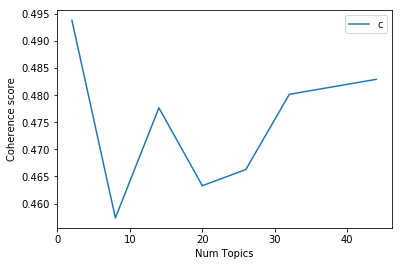

In [7]:
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): # 응집도
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): # 최적의 토픽 개수
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('corona_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)

## LDA 시각화

In [9]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

2020-11-27 17:03:57,077 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-27 17:03:57,108 : INFO : built Dictionary(2460 unique tokens: ['감독', '게시', '공지', '관객', '기간']...) from 338 documents (total 8664 corpus positions)


In [10]:
import gensim
NUM_TOPICS= 14
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2020-11-27 17:04:06,265 : INFO : using symmetric alpha at 0.07142857142857142
2020-11-27 17:04:06,267 : INFO : using symmetric eta at 0.07142857142857142
2020-11-27 17:04:06,269 : INFO : using serial LDA version on this node
2020-11-27 17:04:06,278 : INFO : running online (multi-pass) LDA training, 14 topics, 15 passes over the supplied corpus of 338 documents, updating model once every 338 documents, evaluating perplexity every 338 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-27 17:04:06,759 : INFO : -13.977 per-word bound, 16119.8 perplexity estimate based on a held-out corpus of 338 documents with 8664 words
2020-11-27 17:04:06,760 : INFO : PROGRESS: pass 0, at document #338/338
2020-11-27 17:04:07,081 : INFO : topic #6 (0.071): 0.017*"학기" + 0.013*"교수" + 0.012*"학교" + 0.010*"대면" + 0.009*"때문" + 0.007*"이번" + 0.007*"사람" + 0.007*"수업" + 0.006*"상황" + 0.006*"가능성"
2020-11-27 17:04:07,083 : INFO : topic #8 (0.071): 0.018*"그냥" + 0.015*"등록금" + 0.012*"나라" + 0.012*"집회

2020-11-27 17:04:10,176 : INFO : topic #9 (0.071): 0.018*"보도" + 0.015*"알바" + 0.013*"사람" + 0.013*"신문" + 0.013*"명대" + 0.011*"중국인" + 0.011*"기획" + 0.011*"기사" + 0.010*"확인" + 0.009*"전체"
2020-11-27 17:04:10,180 : INFO : topic #6 (0.071): 0.012*"취업" + 0.011*"대면" + 0.009*"업계" + 0.009*"학기" + 0.008*"가능성" + 0.008*"관련" + 0.007*"때문" + 0.007*"학교" + 0.006*"사람" + 0.006*"이번"
2020-11-27 17:04:10,187 : INFO : topic diff=0.150695, rho=0.353553
2020-11-27 17:04:10,428 : INFO : -7.358 per-word bound, 164.0 perplexity estimate based on a held-out corpus of 338 documents with 8664 words
2020-11-27 17:04:10,429 : INFO : PROGRESS: pass 7, at document #338/338
2020-11-27 17:04:10,580 : INFO : topic #7 (0.071): 0.025*"학기" + 0.020*"휴학" + 0.011*"내년" + 0.011*"때문" + 0.010*"학교" + 0.010*"추가" + 0.009*"건가" + 0.008*"이번" + 0.008*"어차피" + 0.008*"제발"
2020-11-27 17:04:10,582 : INFO : topic #3 (0.071): 0.025*"강의" + 0.019*"교수" + 0.013*"학기" + 0.011*"생각" + 0.011*"교육" + 0.009*"학생" + 0.009*"모두" + 0.009*"진행" + 0.009*"시간" + 0.008*"때문"


2020-11-27 17:04:13,643 : INFO : topic #13 (0.071): 0.034*"학우" + 0.017*"의견" + 0.017*"학교" + 0.016*"우리" + 0.014*"명대" + 0.014*"신문" + 0.013*"대학" + 0.012*"사태" + 0.011*"학기" + 0.011*"교회"
2020-11-27 17:04:13,646 : INFO : topic #2 (0.071): 0.024*"학교" + 0.022*"때문" + 0.022*"졸업" + 0.019*"동아리" + 0.016*"진짜" + 0.012*"장학금" + 0.010*"이번" + 0.010*"모임" + 0.010*"혹시" + 0.008*"사람"
2020-11-27 17:04:13,648 : INFO : topic diff=0.016823, rho=0.258199
2020-11-27 17:04:13,894 : INFO : -7.330 per-word bound, 161.0 perplexity estimate based on a held-out corpus of 338 documents with 8664 words
2020-11-27 17:04:13,895 : INFO : PROGRESS: pass 14, at document #338/338
2020-11-27 17:04:14,055 : INFO : topic #7 (0.071): 0.026*"학기" + 0.021*"휴학" + 0.012*"때문" + 0.012*"내년" + 0.010*"학교" + 0.010*"추가" + 0.010*"건가" + 0.009*"이번" + 0.008*"어차피" + 0.008*"제발"
2020-11-27 17:04:14,057 : INFO : topic #1 (0.071): 0.048*"봉사" + 0.029*"신청" + 0.016*"쓰레기" + 0.014*"마감" + 0.013*"축제" + 0.013*"캠퍼스" + 0.012*"클린" + 0.012*"행사" + 0.012*"간호사" + 0.011*

(0, '0.025*"사람" + 0.021*"강의" + 0.018*"때문" + 0.015*"수업"')
(1, '0.048*"봉사" + 0.029*"신청" + 0.016*"쓰레기" + 0.014*"마감"')
(2, '0.024*"학교" + 0.022*"때문" + 0.022*"졸업" + 0.019*"동아리"')
(3, '0.026*"강의" + 0.020*"교수" + 0.013*"학기" + 0.011*"교육"')
(4, '0.028*"대면" + 0.014*"공부" + 0.011*"준비" + 0.010*"공무원"')
(5, '0.022*"사람" + 0.019*"그냥" + 0.015*"친구" + 0.014*"생각"')
(6, '0.012*"취업" + 0.011*"대면" + 0.009*"업계" + 0.008*"학기"')
(7, '0.026*"학기" + 0.021*"휴학" + 0.012*"때문" + 0.012*"내년"')
(8, '0.029*"등록금" + 0.029*"학기" + 0.021*"그냥" + 0.019*"집회"')
(9, '0.019*"보도" + 0.015*"알바" + 0.014*"사람" + 0.013*"신문"')
(10, '0.016*"의대" + 0.014*"학교" + 0.011*"상제" + 0.011*"프레임"')
(11, '0.018*"학술" + 0.014*"교회" + 0.013*"친구" + 0.012*"기간"')
(12, '0.028*"진자" + 0.018*"감염" + 0.014*"마스크" + 0.014*"대만"')
(13, '0.034*"학우" + 0.017*"의견" + 0.017*"학교" + 0.016*"우리"')


## LDA 시각화

In [11]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 문서별 토픽 확인하기

In [12]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [13]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,10.0,0.9896,"[(10, 0.98956615)]"
1,1,2.0,0.9226,"[(2, 0.92261726)]"
2,2,4.0,0.9226,"[(4, 0.92261463)]"
3,3,13.0,0.8143,"[(0, 0.01428649), (1, 0.014286529), (2, 0.0142..."
4,4,0.0,0.9484,"[(0, 0.9484101)]"
5,5,6.0,0.8673,"[(0, 0.0102045685), (1, 0.010204557), (2, 0.01..."
6,6,6.0,0.8968,"[(6, 0.89682156)]"
7,7,2.0,0.8673,"[(0, 0.010204299), (1, 0.010204307), (2, 0.867..."
8,8,2.0,0.5357,"[(0, 0.035714585), (1, 0.035714697), (2, 0.535..."
9,9,10.0,0.9896,"[(10, 0.98956615)]"


분류된 각 그룹에 대한 적절한 이름을 나름대로 붙여보시오. (몇개에 대해서만)

In [14]:
for topic in topics:
    print(topic)

(0, '0.025*"사람" + 0.021*"강의" + 0.018*"때문" + 0.015*"수업"')
(1, '0.048*"봉사" + 0.029*"신청" + 0.016*"쓰레기" + 0.014*"마감"')
(2, '0.024*"학교" + 0.022*"때문" + 0.022*"졸업" + 0.019*"동아리"')
(3, '0.026*"강의" + 0.020*"교수" + 0.013*"학기" + 0.011*"교육"')
(4, '0.028*"대면" + 0.014*"공부" + 0.011*"준비" + 0.010*"공무원"')
(5, '0.022*"사람" + 0.019*"그냥" + 0.015*"친구" + 0.014*"생각"')
(6, '0.012*"취업" + 0.011*"대면" + 0.009*"업계" + 0.008*"학기"')
(7, '0.026*"학기" + 0.021*"휴학" + 0.012*"때문" + 0.012*"내년"')
(8, '0.029*"등록금" + 0.029*"학기" + 0.021*"그냥" + 0.019*"집회"')
(9, '0.019*"보도" + 0.015*"알바" + 0.014*"사람" + 0.013*"신문"')
(10, '0.016*"의대" + 0.014*"학교" + 0.011*"상제" + 0.011*"프레임"')
(11, '0.018*"학술" + 0.014*"교회" + 0.013*"친구" + 0.012*"기간"')
(12, '0.028*"진자" + 0.018*"감염" + 0.014*"마스크" + 0.014*"대만"')
(13, '0.034*"학우" + 0.017*"의견" + 0.017*"학교" + 0.016*"우리"')


TOPIC 0: 강의와 수업에 대한 불만  
TOPIC 4: 공무원 준비에 대한 관심  
TOPIC 7: 내년 학기 휴학에 대한 생각